#Tourism_resource_dataset.

Dataset Overview:


timestamp: Date and time of data recording.

location_id: Unique ID for a tourism location.

visitor_count: Number of visitors.

resource_usage_rate: Rate of resource usage (0 to 1 scale).

temperature: Recorded temperature (°C).

air_quality_index: AQI values.

noise_level: Noise level in decibels.

season: Season of the year.

peak_hour_flag: Binary indicator for peak hours.

visitor_satisfaction: Visitor satisfaction score.

sensor_noise_flag: Noise sensor activation status.

resource_prediction: Predicted resource usage.

resource_allocation: Allocation level (low, medium, high).

t_sne_dim1 & t_sne_dim2: Dimensionality reduction coordinates for visualization.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
file_path = "/content/archive.zip"
data = pd.read_csv(file_path)

print("Dataset Shape:", data.shape)



Dataset Shape: (1000, 15)


In [ ]:
print("\nColumns:\n", data.columns)



Columns:
 Index(['timestamp', 'location_id', 'visitor_count', 'resource_usage_rate',
       'temperature', 'air_quality_index', 'noise_level', 'season',
       'peak_hour_flag', 'visitor_satisfaction', 'sensor_noise_flag',
       'resource_prediction', 'resource_allocation', 't_sne_dim1',
       't_sne_dim2'],
      dtype='object')


In [ ]:
print("\nMissing Values:\n", data.isnull().sum())



Missing Values:
 timestamp               0
location_id             0
visitor_count           0
resource_usage_rate     0
temperature             0
air_quality_index       0
noise_level             0
season                  0
peak_hour_flag          0
visitor_satisfaction    0
sensor_noise_flag       0
resource_prediction     0
resource_allocation     0
t_sne_dim1              0
t_sne_dim2              0
dtype: int64


In [ ]:
print("\nSample Data:\n", data.head())


Sample Data:
              timestamp location_id  visitor_count  resource_usage_rate  \
0  2024-12-01 00:00:00     LOC_003            808             0.907638   
1  2024-12-01 01:00:00     LOC_001            948             0.974266   
2  2024-12-01 02:00:00     LOC_003            292             0.321912   
3  2024-12-01 03:00:00     LOC_003            592             0.811889   
4  2024-12-01 04:00:00     LOC_001             89             0.936667   

   temperature  air_quality_index  noise_level  season  peak_hour_flag  \
0    19.368864                127    51.506727  summer               0   
1    17.404945                 37    55.901717  autumn               0   
2    16.366819                113    68.533024  winter               1   
3    20.266316                 52    85.301039  autumn               1   
4    15.922471                145    52.258779  summer               1   

   visitor_satisfaction  sensor_noise_flag  resource_prediction  \
0              5.502615     

In [6]:
data.describe()

,visitor_count,resource_usage_rate,temperature,air_quality_index,noise_level,peak_hour_flag,visitor_satisfaction,sensor_noise_flag,resource_prediction,t_sne_dim1,t_sne_dim2
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,516.800000,0.647452,25.181186,86.485000,64.028052,0.511000,5.555733,0.467000,0.582126,-0.477890,-0.422334
std,281.178718,0.199183,5.758527,37.615166,19.916098,0.500129,2.554291,0.499159,0.174560,17.179542,15.797633
min,50.000000,0.300132,15.008856,20.000000,30.013057,0.000000,1.014411,0.000000,0.184301,-34.308690,-38.914820
25%,274.000000,0.469661,20.231001,53.000000,46.979884,0.000000,3.468966,0.000000,0.462370,-13.762012,-12.932375
50%,510.000000,0.652413,25.449839,87.000000,63.456537,1.000000,5.599099,0.000000,0.576830,-0.444045,0.167176
75%,762.250000,0.818292,30.240147,120.000000,81.232047,1.000000,7.725748,1.000000,0.701947,12.986121,12.436126
max,999.000000,0.997955,34.994276,149.000000,99.826269,1.000000,9.997764,1.000000,0.976715,36.515007,33.652870


In [7]:
data["visitor_satisfaction"].value_counts()

,count
visitor_satisfaction,
5.502615,1
4.416394,1
8.729574,1
6.659858,1
7.865631,1
...,...
9.213394,1
8.864152,1
5.516383,1


#Visitor Count vs. Resource Usage Rate

#Scatter Plot
Scatter plots use a collection of points placed using Cartesian coordinates to display values from two variables.

By displaying a variable in each axis, we can detect if a relationship or correlation between the two variables exists. Scatter Plots are also great for observing the spread of the data as they retain the exact data values and sample size

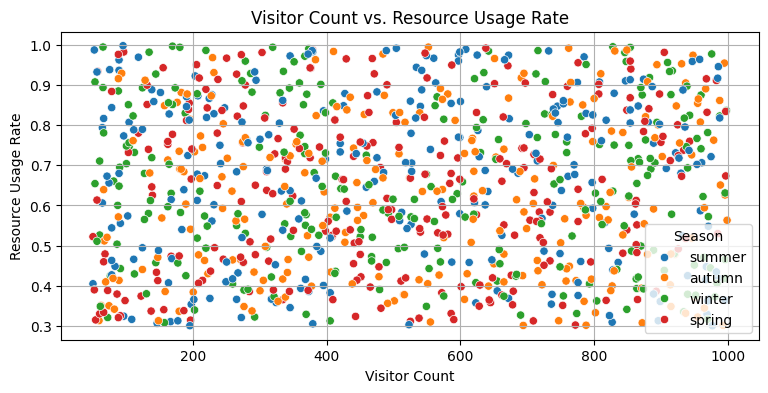

In [ ]:
# Scatter plot 1: Visitor Count vs. Resource Usage Rate
plt.figure(figsize=(9, 4))
sns.scatterplot(data=data, x="visitor_count", y="resource_usage_rate", hue="season")
plt.title("Visitor Count vs. Resource Usage Rate")
plt.xlabel("Visitor Count")
plt.ylabel("Resource Usage Rate")
plt.legend(title="Season")
plt.grid()
plt.show()


# Temperature vs. Visitor Satisfaction

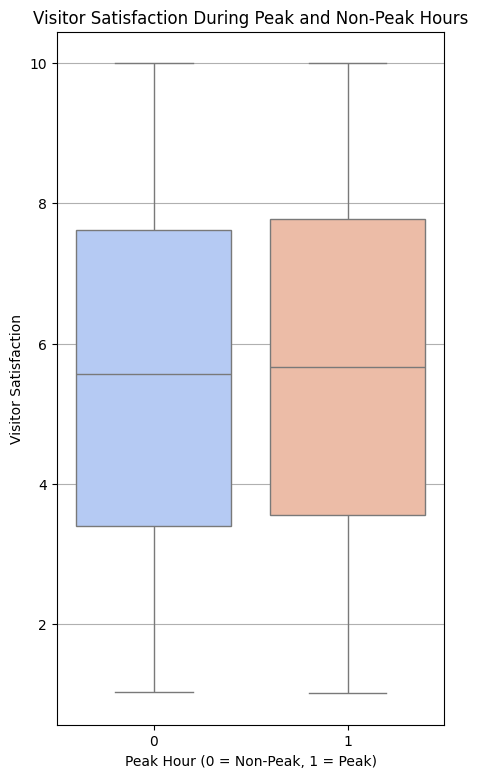

In [ ]:
# Box plot: Temperature vs. Visitor Satisfaction
plt.figure(figsize=(5, 9))
sns.boxplot(data=data, x="peak_hour_flag", y="visitor_satisfaction", palette="coolwarm")
plt.title("Visitor Satisfaction During Peak and Non-Peak Hours")
plt.xlabel("Peak Hour (0 = Non-Peak, 1 = Peak)")
plt.ylabel("Visitor Satisfaction")
plt.grid(axis='y')
plt.show()


#Histogram

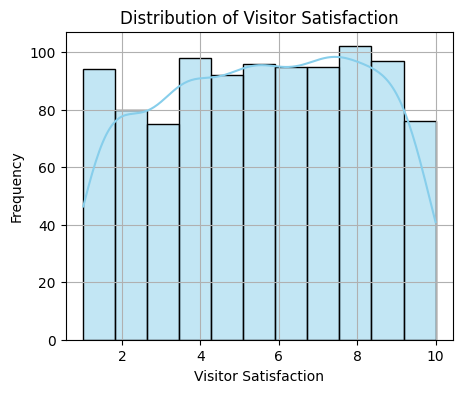

In [10]:
plt.figure(figsize=(5, 4))
sns.histplot(data=data, x="visitor_satisfaction", kde=True, color="skyblue")
plt.title("Distribution of Visitor Satisfaction")
plt.xlabel("Visitor Satisfaction")
plt.ylabel("Frequency")
plt.grid()
plt.show()


#Line Plot: Visitor Count Over Time

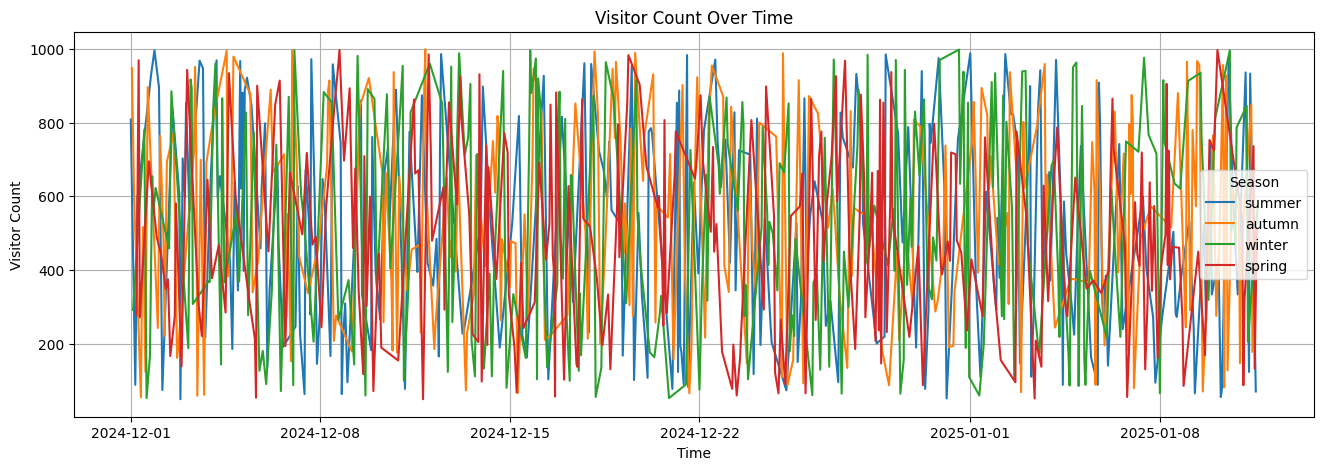

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.sort_values('timestamp', inplace=True)

plt.figure(figsize=(16, 5))
sns.lineplot(data=data, x="timestamp", y="visitor_count", hue="season", palette="tab10")
plt.title("Visitor Count Over Time")
plt.xlabel("Time")
plt.ylabel("Visitor Count")
plt.legend(title="Season")
plt.grid()
plt.show()


#Count Plot: Peak Hour Flag

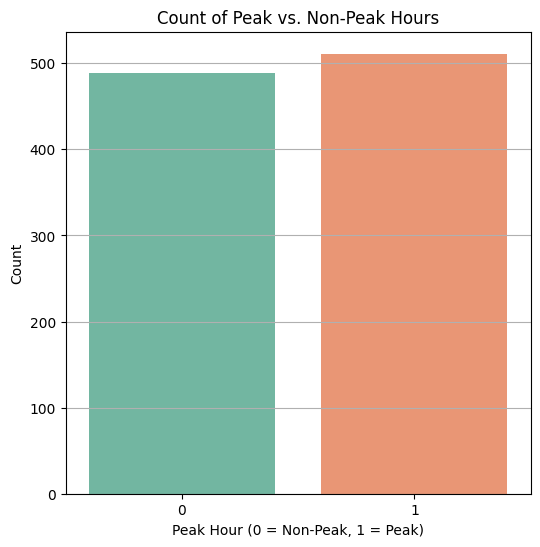

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x="peak_hour_flag", palette="Set2")
plt.title("Count of Peak vs. Non-Peak Hours")
plt.xlabel("Peak Hour (0 = Non-Peak, 1 = Peak)")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()


## Bar plot: Total Tourists by Season

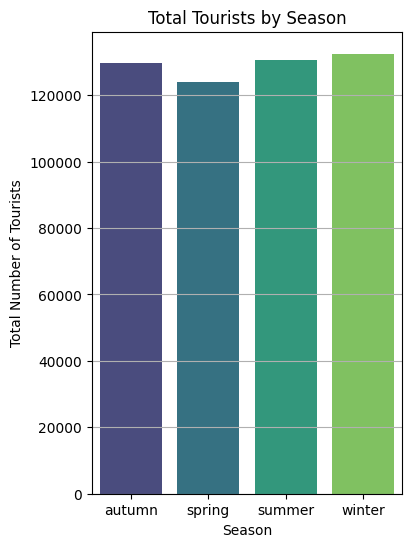

In [15]:
season_tourists = data.groupby('season')['visitor_count'].sum().reset_index()
plt.figure(figsize=(4, 6))
sns.barplot(data=season_tourists, x='season', y='visitor_count', palette='viridis')
plt.title("Total Tourists by Season")
plt.xlabel("Season")
plt.ylabel("Total Number of Tourists")
plt.grid(axis='y')
plt.show()

#Heatmap: Correlation Matrix

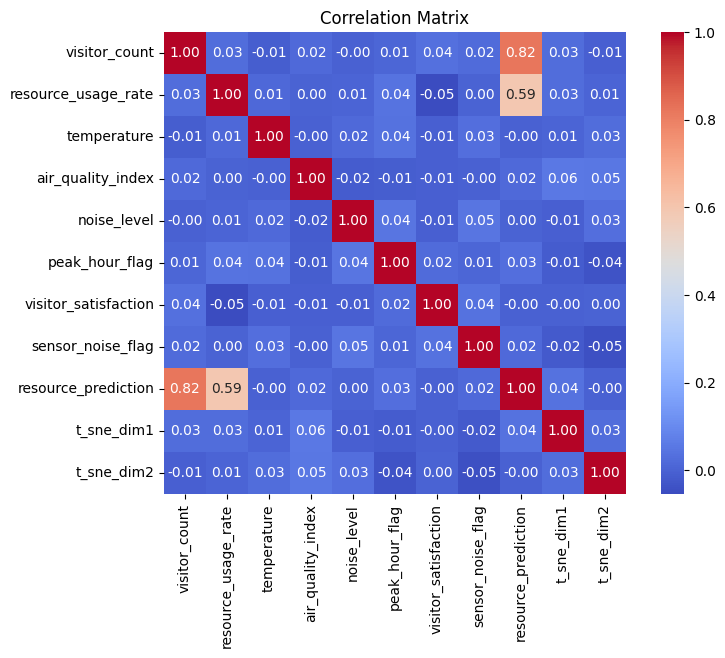

In [20]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
tourism = numeric_data.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(tourism, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()
